## Regresión Lineal Boston con estandarización

### Importar los datos

In [1]:
from sklearn.datasets import load_boston

In [2]:
# se crea el diccionario boston
boston = load_boston()

/home/alex/Documentos/ApuntesSM/CICLO-VII/IA/Parte_practica/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative 

In [3]:
# devuelve las claves del diccionario boston
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
caracteristicas = boston.feature_names

In [7]:
import pandas as pd

In [8]:
df_entrada = pd.DataFrame(boston['data'],columns=caracteristicas)

In [9]:
df_entrada.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [10]:
df_salida = pd.DataFrame(boston['target'],columns=['PreMediano'])

In [11]:
df_salida.head()

PreMediano
0        24.0
1        21.6
2        34.7
3        33.4
4        36.2

In [12]:
df = pd.concat([df_entrada,df_salida],axis=1)

In [13]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PreMediano  
0     15.3  396.90   4.98        24.0  
1     17.8  396.90   9.14        21.6  
2     17.8  392.83   4.03        34.7  
3     18.7  394.63   2.94        33.4  
4     18.7  396.90   5.33        36.2

## Análisis Exploratorio

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

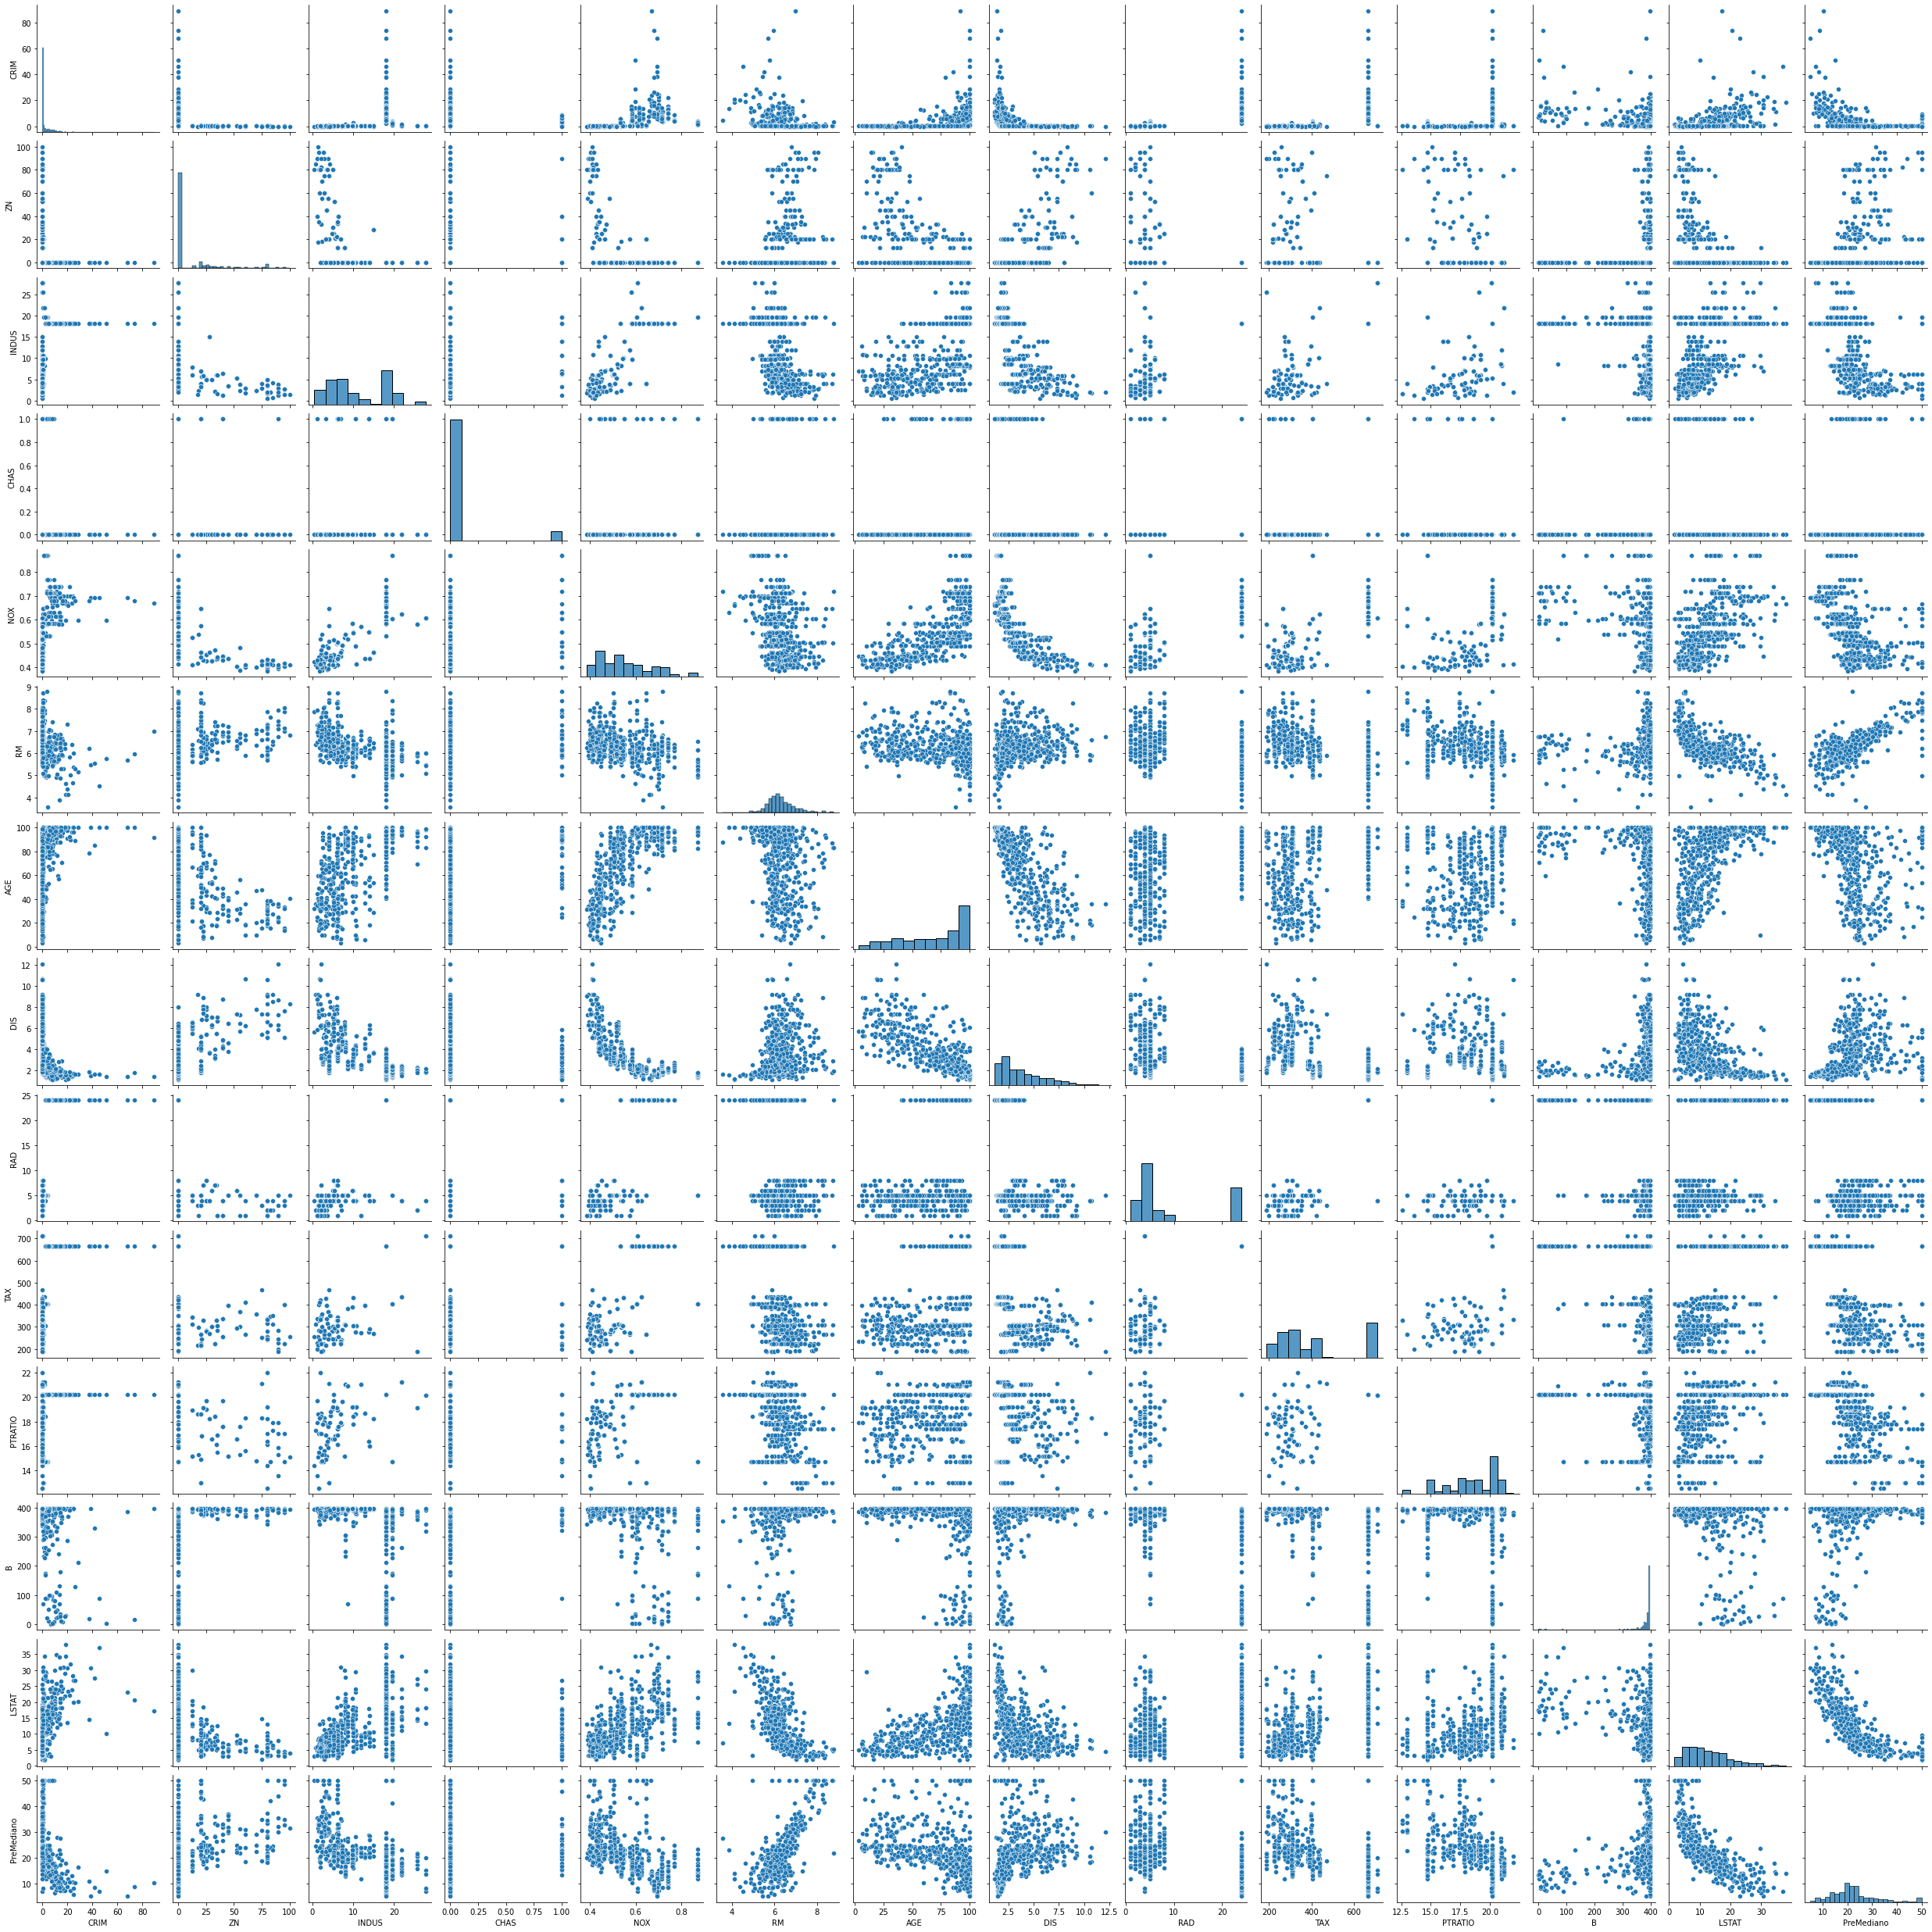

In [15]:
sns.pairplot(df)

## Determinar conjuntos de entrada y de salida

In [16]:
X = df.drop('PreMediano',axis=1)

In [17]:
y = df['PreMediano']

## Estandarización de los datos de entrada

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# se crea una escala
escala = StandardScaler()

In [20]:
# entrenar la escala con los datos de entrada
escala.fit(X)

StandardScaler()

In [21]:
X_escala = escala.transform(X)

In [22]:
X_escala[0:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

## Separar conjunto de entrenamiento y prueba

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_escala,y,test_size=0.30,random_state=101)

## Crear el modelo

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
modeloLineal = LinearRegression()

## Entrenar el modelo

In [27]:
modeloLineal.fit(X_train,y_train)

LinearRegression()

In [28]:
print("Interceptor: ",modeloLineal.intercept_)

Interceptor:  22.3554601886972


In [29]:
print("Coeficientes:",modeloLineal.coef_)

Coeficientes: [-0.76052691  1.1717931   0.13945859  0.95261963 -2.05460677  2.27967932
  0.3374754  -2.96435189  2.29540607 -1.74162456 -2.05851662  0.55780783
 -4.25994935]


## Evaluar el modelo

In [30]:
predicciones = modeloLineal.predict(X_test)

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valores predichos')

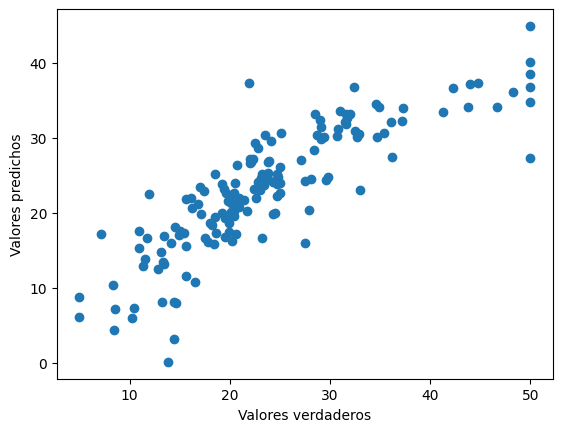

In [32]:
plt.scatter(y_test,predicciones)
plt.xlabel('Valores verdaderos')
plt.ylabel('Valores predichos')

In [33]:
import seaborn as sns

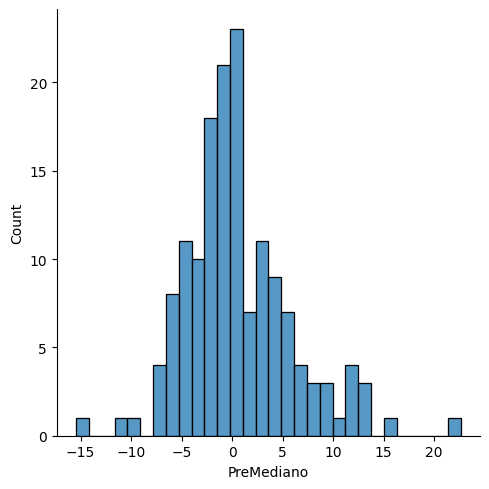

In [34]:
sns.displot((y_test-predicciones),bins=30)

In [35]:
from sklearn import metrics

In [36]:
import numpy as np

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))
print('R cuadrado:',metrics.r2_score(y_test, predicciones))

MAE: 3.8356963614189366
MSE: 28.547585271468154
RMSE: 5.342994036256091
R cuadrado: 0.7123963332666872


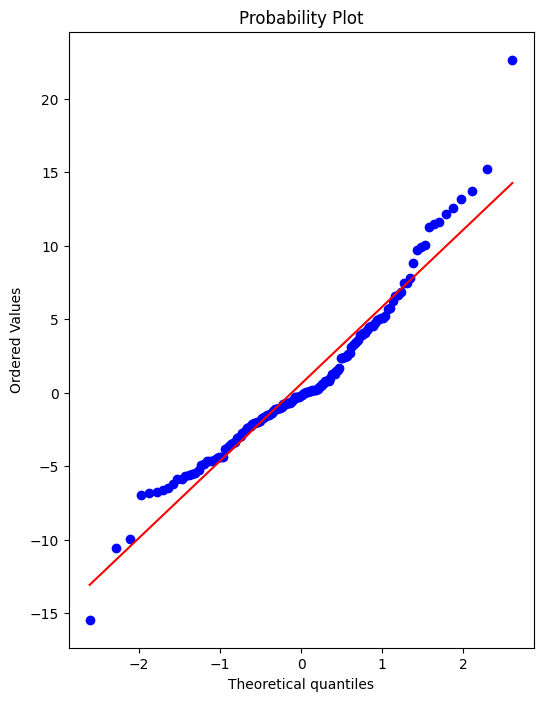

In [38]:
import scipy as sp
res_test = y_test - predicciones
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(res_test,plot=ax)

## Predicción de nuevos casos

In [39]:
import numpy as np
ent1 = df_entrada[15:20]

In [40]:
# Suponiendo que estas filas fueras nuevos casos
ent1

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
15  0.62739  0.0   8.14   0.0  0.538  5.834  56.5  4.4986  4.0  307.0   
16  1.05393  0.0   8.14   0.0  0.538  5.935  29.3  4.4986  4.0  307.0   
17  0.78420  0.0   8.14   0.0  0.538  5.990  81.7  4.2579  4.0  307.0   
18  0.80271  0.0   8.14   0.0  0.538  5.456  36.6  3.7965  4.0  307.0   
19  0.72580  0.0   8.14   0.0  0.538  5.727  69.5  3.7965  4.0  307.0   

    PTRATIO       B  LSTAT  
15     21.0  395.62   8.47  
16     21.0  386.85   6.58  
17     21.0  386.75  14.67  
18     21.0  288.99  11.69  
19     21.0  390.95  11.28

In [41]:
# Genera una predicción erronea porque los datos no están
# estandarizados y el modelo fue entrenado con datos
# estandarizados
pred1 = modeloLineal.predict(ent1)

/home/alex/Documentos/ApuntesSM/CICLO-VII/IA/Parte_practica/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
# Predicción erronea
pred1

array([-343.18809882, -349.30224762, -365.09326887, -422.01372766,
       -351.61383651])

Procedimiento correcto

In [43]:
ent2 = escala.transform(ent1)

In [44]:
pred2 = modeloLineal.predict(ent2)

In [45]:
# predicciones correctas
pred2

array([19.32107821, 20.35987372, 16.69898193, 16.25354375, 18.40373436])

In [46]:
# Valores verdaderos
y[15:20]

15    19.9
16    23.1
17    17.5
18    20.2
19    18.2
Name: PreMediano, dtype: float64